In [1]:
# importing libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier


%matplotlib inline

In [2]:
# Reading my dataset 

df = pd.read_csv('Loan_Default.csv')

In [3]:
# Checking the dataset heading

df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


# Exploring the Data Set

In [4]:
#Checking the number of row and column
df.shape

(148670, 34)

In [5]:
#showing the size of my dataset

df.size

5054780

In [6]:
# Displaying all headings
pd.set_option("display.max_columns", df.shape[-1]) 
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:
# Extracting columns
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [8]:
# Changing my heading from lower case to upper case

df.columns= df.columns.str.upper()

In [9]:
df.columns

Index(['ID', 'YEAR', 'LOAN_LIMIT', 'GENDER', 'APPROV_IN_ADV', 'LOAN_TYPE',
       'LOAN_PURPOSE', 'CREDIT_WORTHINESS', 'OPEN_CREDIT',
       'BUSINESS_OR_COMMERCIAL', 'LOAN_AMOUNT', 'RATE_OF_INTEREST',
       'INTEREST_RATE_SPREAD', 'UPFRONT_CHARGES', 'TERM', 'NEG_AMMORTIZATION',
       'INTEREST_ONLY', 'LUMP_SUM_PAYMENT', 'PROPERTY_VALUE',
       'CONSTRUCTION_TYPE', 'OCCUPANCY_TYPE', 'SECURED_BY', 'TOTAL_UNITS',
       'INCOME', 'CREDIT_TYPE', 'CREDIT_SCORE', 'CO-APPLICANT_CREDIT_TYPE',
       'AGE', 'SUBMISSION_OF_APPLICATION', 'LTV', 'REGION', 'SECURITY_TYPE',
       'STATUS', 'DTIR1'],
      dtype='object')

In [10]:
# 
df.describe()

,ID,YEAR,LOAN_AMOUNT,RATE_OF_INTEREST,INTEREST_RATE_SPREAD,UPFRONT_CHARGES,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,LTV,STATUS,DTIR1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


# Removing Unused Columns

In [11]:
# Dropping the column that are not need for loan decision making

columns= ['ID', 'YEAR','LOAN_LIMIT','GENDER','APPROV_IN_ADV','CREDIT_WORTHINESS','OPEN_CREDIT','BUSINESS_OR_COMMERCIAL','INTEREST_RATE_SPREAD', 'UPFRONT_CHARGES','NEG_AMMORTIZATION','INTEREST_ONLY','LUMP_SUM_PAYMENT','CONSTRUCTION_TYPE','SECURED_BY','TOTAL_UNITS','CREDIT_TYPE','CO-APPLICANT_CREDIT_TYPE','LOAN_PURPOSE','OCCUPANCY_TYPE','SUBMISSION_OF_APPLICATION','LTV','REGION','SECURITY_TYPE']
df.drop(columns,axis=1, inplace =True)

In [12]:
df.columns

Index(['LOAN_TYPE', 'LOAN_AMOUNT', 'RATE_OF_INTEREST', 'TERM',
       'PROPERTY_VALUE', 'INCOME', 'CREDIT_SCORE', 'AGE', 'STATUS', 'DTIR1'],
      dtype='object')

In [13]:
# Showing the number of column available to work with

df.shape


(148670, 10)

In [14]:
df.size

1486700

# Displaying Updated data heading

In [15]:
df.head()

,LOAN_TYPE,LOAN_AMOUNT,RATE_OF_INTEREST,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,AGE,STATUS,DTIR1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.56,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.25,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.00,360.0,758000.0,10440.0,602,25-34,0,39.0


# Removing Duplicate

In [16]:
# Removing repeated data

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
148665    False
148666    False
148667    False
148668    False
148669    False
Length: 148670, dtype: bool

In [17]:
df.duplicated().sum()

6

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
# confirming duplicate
df.duplicated().sum()

0

In [20]:
df

,LOAN_TYPE,LOAN_AMOUNT,RATE_OF_INTEREST,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,AGE,STATUS,DTIR1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.560,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.250,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.000,360.0,758000.0,10440.0,602,25-34,0,39.0
...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,3.125,180.0,608000.0,7860.0,659,55-64,0,48.0
148666,type1,586500,5.190,360.0,788000.0,7140.0,569,25-34,0,15.0
148667,type1,446500,3.125,180.0,728000.0,6900.0,702,45-54,0,49.0
148668,type1,196500,3.500,180.0,278000.0,7140.0,737,55-64,0,29.0


# Checking for Nan Values

In [21]:
# Printing out the total missing value

df.isna().sum()

LOAN_TYPE               0
LOAN_AMOUNT             0
RATE_OF_INTEREST    36437
TERM                   41
PROPERTY_VALUE      15096
INCOME               9146
CREDIT_SCORE            0
AGE                   200
STATUS                  0
DTIR1               24115
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LOAN_TYPE         148664 non-null  object 
 1   LOAN_AMOUNT       148664 non-null  int64  
 2   RATE_OF_INTEREST  112227 non-null  float64
 3   TERM              148623 non-null  float64
 4   PROPERTY_VALUE    133568 non-null  float64
 5   INCOME            139518 non-null  float64
 6   CREDIT_SCORE      148664 non-null  int64  
 7   AGE               148464 non-null  object 
 8   STATUS            148664 non-null  int64  
 9   DTIR1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


In [23]:
# Displaying the data type available in each column
df.dtypes

LOAN_TYPE            object
LOAN_AMOUNT           int64
RATE_OF_INTEREST    float64
TERM                float64
PROPERTY_VALUE      float64
INCOME              float64
CREDIT_SCORE          int64
AGE                  object
STATUS                int64
DTIR1               float64
dtype: object

In [24]:
# Displaying missing Values
df.isna()

,LOAN_TYPE,LOAN_AMOUNT,RATE_OF_INTEREST,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,AGE,STATUS,DTIR1
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
148665,False,False,False,False,False,False,False,False,False,False
148666,False,False,False,False,False,False,False,False,False,False
148667,False,False,False,False,False,False,False,False,False,False
148668,False,False,False,False,False,False,False,False,False,False


In [25]:
df

,LOAN_TYPE,LOAN_AMOUNT,RATE_OF_INTEREST,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,AGE,STATUS,DTIR1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.560,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.250,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.000,360.0,758000.0,10440.0,602,25-34,0,39.0
...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,3.125,180.0,608000.0,7860.0,659,55-64,0,48.0
148666,type1,586500,5.190,360.0,788000.0,7140.0,569,25-34,0,15.0
148667,type1,446500,3.125,180.0,728000.0,6900.0,702,45-54,0,49.0
148668,type1,196500,3.500,180.0,278000.0,7140.0,737,55-64,0,29.0


# Replacing Nan with Mean

In [26]:
# Calculating mean 
mean_int = df['RATE_OF_INTEREST'].mean()

In [27]:
# replacing nan with mean
df['RATE_OF_INTEREST'].fillna(value=mean_int, inplace=True)

In [28]:
# calculating property_value mean
mean_property = df['PROPERTY_VALUE'].mean()

In [29]:
print(mean_property)

497900.2006468615


In [30]:
df['PROPERTY_VALUE'].fillna(value=mean_property, inplace=True)

# Replacing Nan with Maxium Value

In [31]:
# Replacing Term with maxium value
df['TERM'].fillna(value=360.0, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LOAN_TYPE         148664 non-null  object 
 1   LOAN_AMOUNT       148664 non-null  int64  
 2   RATE_OF_INTEREST  148664 non-null  float64
 3   TERM              148664 non-null  float64
 4   PROPERTY_VALUE    148664 non-null  float64
 5   INCOME            139518 non-null  float64
 6   CREDIT_SCORE      148664 non-null  int64  
 7   AGE               148464 non-null  object 
 8   STATUS            148664 non-null  int64  
 9   DTIR1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


# Replacing Nan with Mean

In [33]:
mean_income = df['INCOME'].mean()

In [34]:
df['INCOME'].fillna(value=mean_income, inplace=True)

In [35]:
df.dropna(subset=['AGE'], inplace=True)

In [36]:
mean_dtir1 = df['DTIR1'].mean()

In [37]:
df['DTIR1'].fillna(value=mean_dtir1, inplace=True)

In [38]:
#checking to confirm if all nan values has been corrected 
df.isna().sum()

LOAN_TYPE           0
LOAN_AMOUNT         0
RATE_OF_INTEREST    0
TERM                0
PROPERTY_VALUE      0
INCOME              0
CREDIT_SCORE        0
AGE                 0
STATUS              0
DTIR1               0
dtype: int64

# Rounding up to 2 Decimal places

In [39]:
df = np.round(df, decimals = 2)

# Converting from Float to Integer

In [40]:
df['RATE_OF_INTEREST'] = df['RATE_OF_INTEREST'].astype(int)

In [41]:
# checking to see the convertion
df

,LOAN_TYPE,LOAN_AMOUNT,RATE_OF_INTEREST,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,AGE,STATUS,DTIR1
0,type1,116500,4,360.0,118000.0,1740.0,758,25-34,1,45.00
1,type2,206500,4,360.0,497900.2,4980.0,552,55-64,1,37.73
2,type1,406500,4,360.0,508000.0,9480.0,834,35-44,0,46.00
3,type1,456500,4,360.0,658000.0,11880.0,587,45-54,0,42.00
4,type1,696500,4,360.0,758000.0,10440.0,602,25-34,0,39.00
...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,3,180.0,608000.0,7860.0,659,55-64,0,48.00
148666,type1,586500,5,360.0,788000.0,7140.0,569,25-34,0,15.00
148667,type1,446500,3,180.0,728000.0,6900.0,702,45-54,0,49.00
148668,type1,196500,3,180.0,278000.0,7140.0,737,55-64,0,29.00


In [42]:
#checking for numbers of approved and non-approved loan 
loan_approval = df['STATUS'].value_counts()
print(loan_approval)

0    112027
1     36437
Name: STATUS, dtype: int64


# Data Visualisation

<AxesSubplot:xlabel='AGE', ylabel='count'>

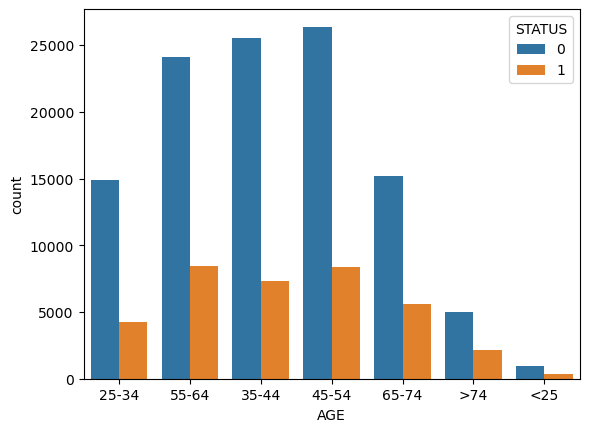

In [43]:
# Distribution of loan base on age
sns.countplot(x='AGE',hue='STATUS',data=df)

<AxesSubplot:xlabel='LOAN_TYPE', ylabel='count'>

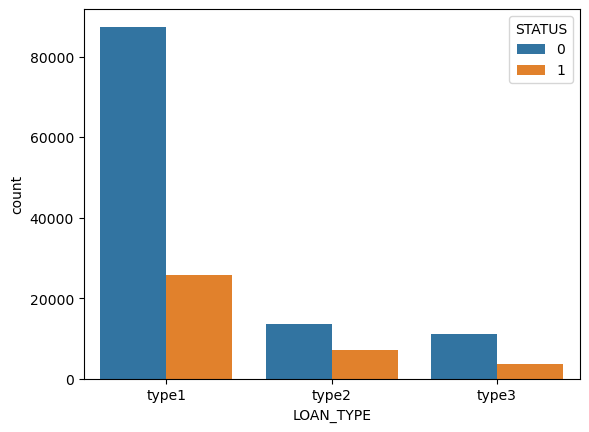

In [44]:
# Distribution of loan based on loan_type
sns.countplot(x='LOAN_TYPE',hue='STATUS',data=df)


<AxesSubplot:title={'center':'INCOME'}, xlabel='LOAN_TYPE'>

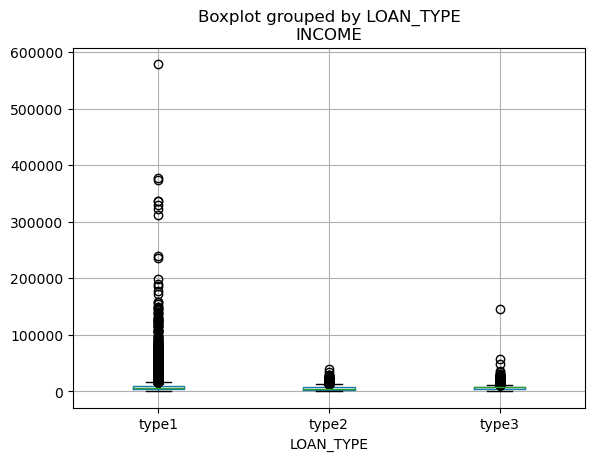

In [45]:
#income split based on loan_type
df.boxplot(column='INCOME',by='LOAN_TYPE')

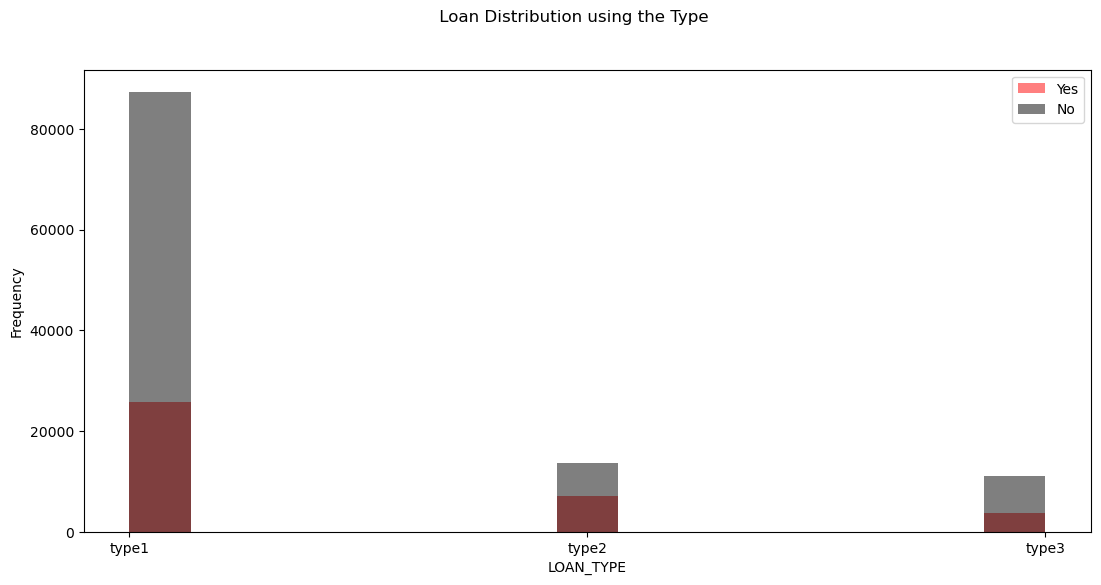

In [46]:
# Loan assign to type
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["STATUS"]==1]["LOAN_TYPE"], bins=15, alpha=0.5, color="red", label="Yes")
ax.hist(df[df["STATUS"]==0]["LOAN_TYPE"], bins=15, alpha=0.5, color="black", label="No")

ax.set_xlabel("LOAN_TYPE")
ax.set_ylabel("Frequency")

fig.suptitle(" Loan Distribution using the Type")

ax.legend();

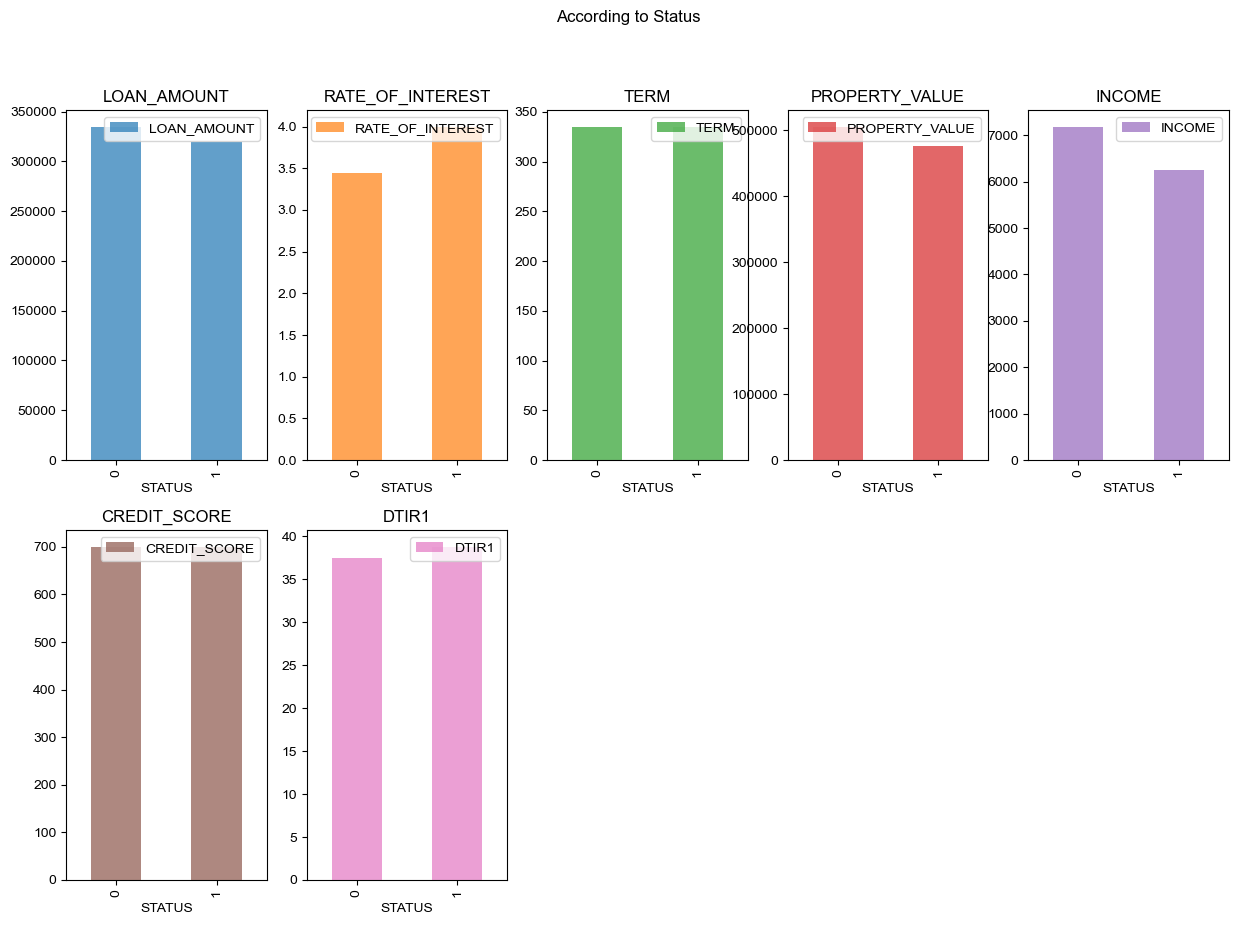

In [47]:
# Exploying all variables through loan status
loan_status =df.groupby("STATUS").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,5),alpha=0.7,title="According to Status")
data=sns.set_style("darkgrid")
data=sns.set_context('paper')
plt.show()

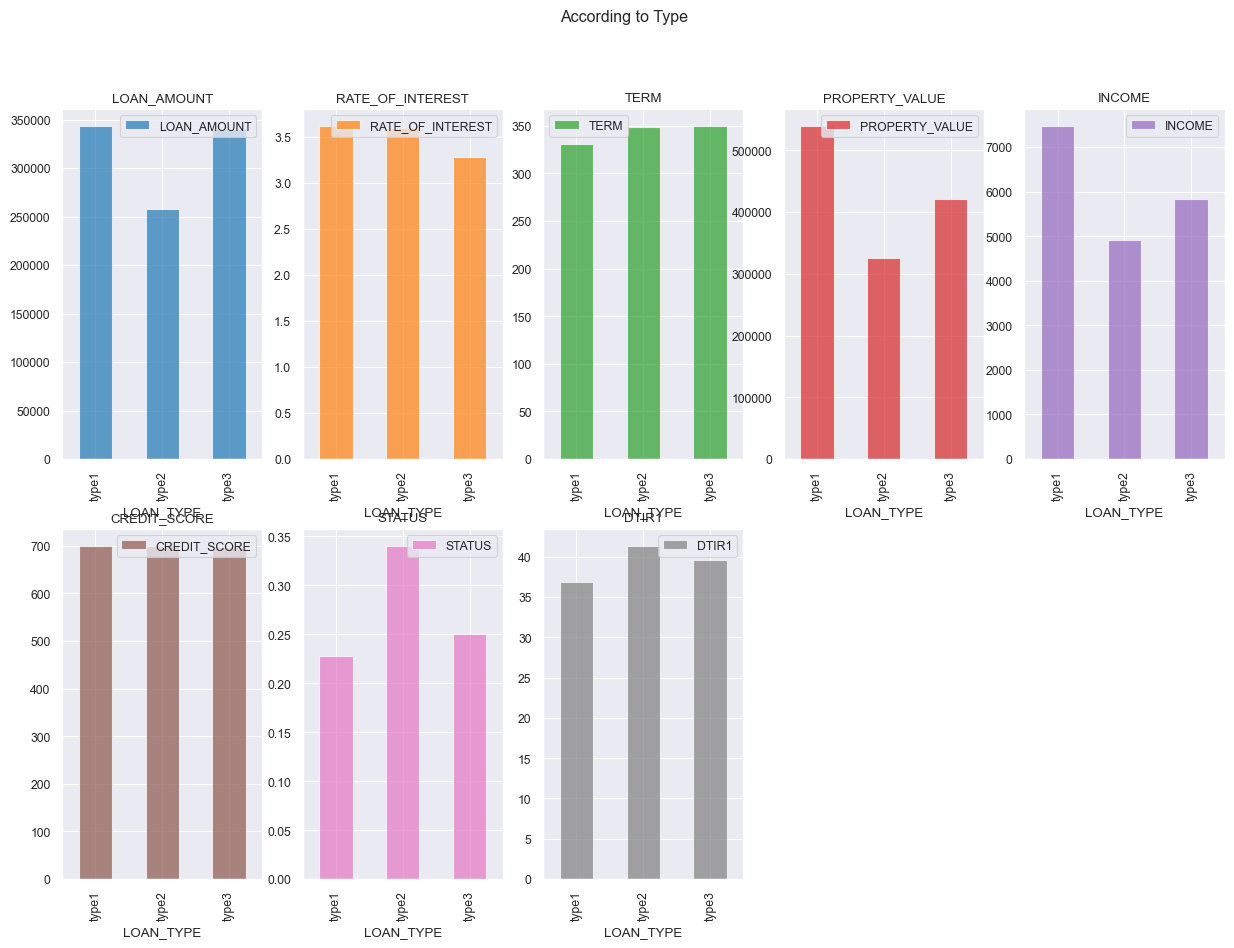

In [48]:
# Displaying all variables through loan type
loan_type =df.groupby("LOAN_TYPE").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,5),alpha=0.7,title="According to Type")
data=sns.set_style("darkgrid")
ata=sns.set_context('paper')
plt.show()

<AxesSubplot:ylabel='STATUS'>

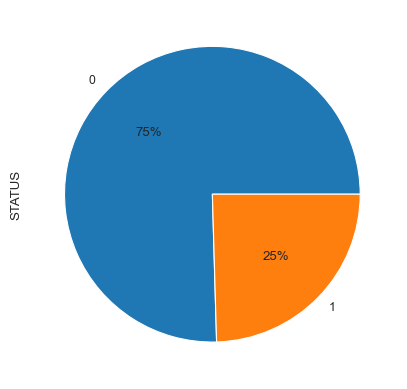

In [49]:
# checking for imbalance dataset

df["STATUS"].value_counts().plot(kind= 'pie', autopct='%1.0f%%')

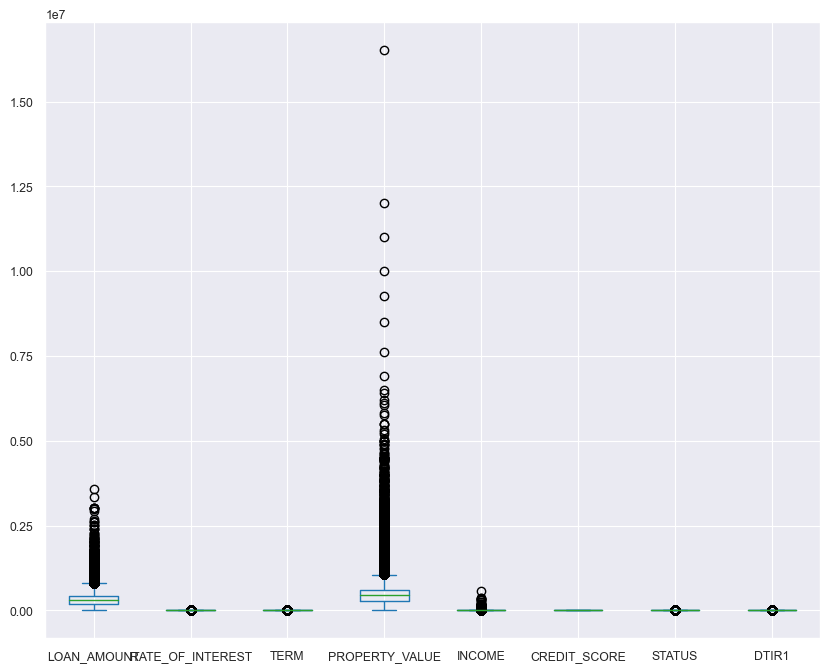

In [50]:
# using the boxplot to check for outliers 
loan_parameter = df.plot.box(figsize=(10, 8))

C:\Users\joyma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROPERTY_VALUE'>

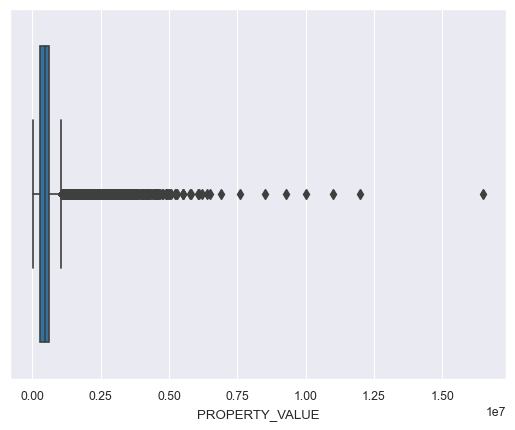

In [51]:
# Box Plot for Property_Value Outlier
sns.boxplot(df['PROPERTY_VALUE'])

In [52]:
# Position of outlier for property_value
(np.where(df['PROPERTY_VALUE']>1.25))

(array([     0,      1,      2, ..., 148461, 148462, 148463], dtype=int64),)

# Using Zero Score Method

In [53]:
# finding the limit
upper_limit = df["PROPERTY_VALUE"].mean() + 3 * df["PROPERTY_VALUE"].std()
lower_limit = df["PROPERTY_VALUE"].mean() - 3 * df["PROPERTY_VALUE"].std()
print("upper_limit:", upper_limit)
print("lower_limit:", lower_limit)

upper_limit: 1521904.6368498115
lower_limit: -525430.940611277


In [54]:
# finding outliers
df.loc[(df["PROPERTY_VALUE"] > upper_limit) | (df["PROPERTY_VALUE"] < lower_limit)]

,LOAN_TYPE,LOAN_AMOUNT,RATE_OF_INTEREST,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,AGE,STATUS,DTIR1
89,type1,56500,4,360.0,2008000.0,7980.0,677,65-74,0,41.0
91,type1,346500,3,360.0,3408000.0,11460.0,638,>74,0,25.0
137,type1,1376500,4,360.0,1708000.0,54300.0,572,55-64,1,10.0
264,type1,1226500,4,360.0,1758000.0,16260.0,711,45-54,0,37.0
330,type1,1486500,3,360.0,2128000.0,23760.0,861,35-44,0,39.0
...,...,...,...,...,...,...,...,...,...,...
148484,type1,366500,2,360.0,1978000.0,17160.0,625,55-64,0,15.0
148526,type1,1106500,3,360.0,1658000.0,15480.0,746,35-44,0,39.0
148576,type1,646500,3,360.0,1558000.0,13920.0,871,45-54,0,31.0
148600,type1,446500,3,360.0,1908000.0,21240.0,710,55-64,0,16.0


In [55]:
# capping method: changing the outlier to upper and lower limit values
new_df = df.copy()
new_df.loc[(new_df ["PROPERTY_VALUE"] > upper_limit), "PROPERTY_VALUE"] = upper_limit
new_df.loc[(new_df ["PROPERTY_VALUE"] < lower_limit), "PROPERTY_VALUE"] = lower_limit


C:\Users\joyma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROPERTY_VALUE'>

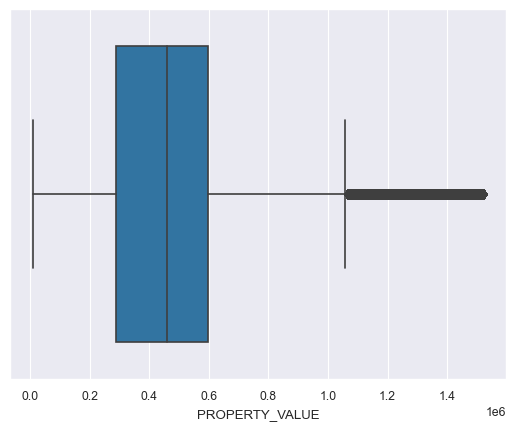

In [56]:
# using box plot to check the outlier
sns.boxplot(new_df["PROPERTY_VALUE"])

<AxesSubplot:>

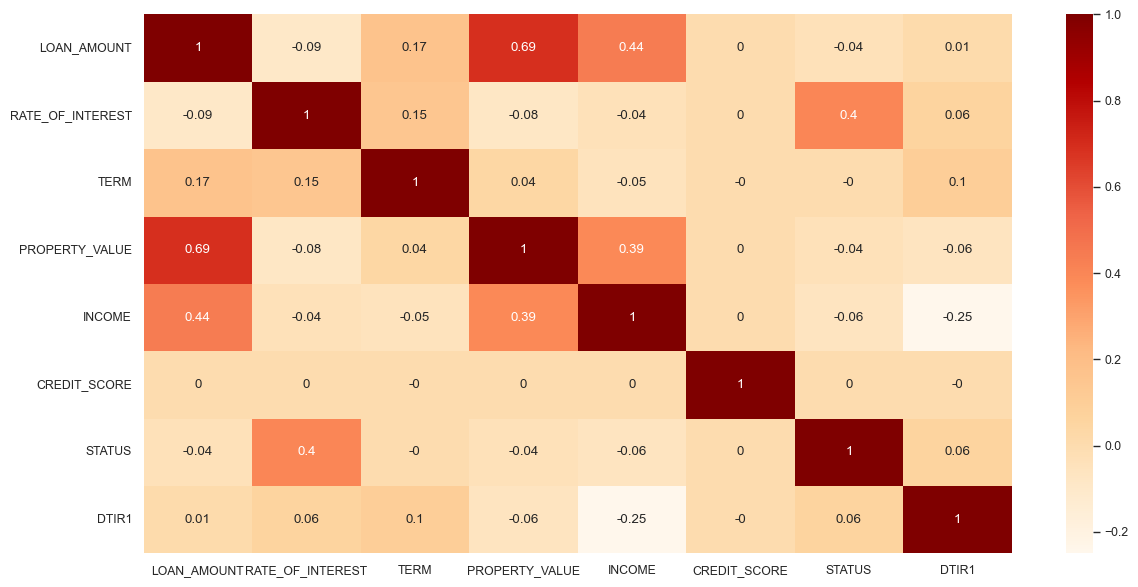

In [58]:
# Correlation Matrix
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'OrRd')

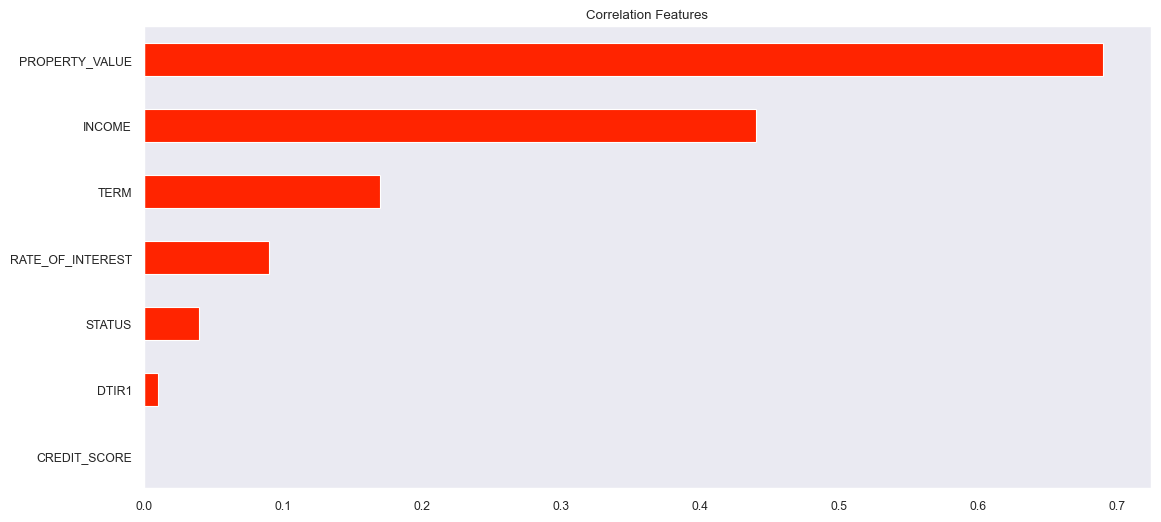

In [59]:
# Correlation Matrix Analysis
sns.set_style('dark')
sns.set_palette('autumn')
plt.figure(figsize = (13,6))
plt.title('Correlation Features')
abs(correlation['LOAN_AMOUNT']).sort_values()[:-1].plot.barh()
plt.show()

In [60]:
# Data Standardisation 
df_sd = ['LOAN_AMOUNT', 'PROPERTY_VALUE', 'INCOME']
Scaler = StandardScaler()
df[df_sd] = Scaler.fit_transform(df[df_sd])

In [61]:
df

,LOAN_TYPE,LOAN_AMOUNT,RATE_OF_INTEREST,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,AGE,STATUS,DTIR1
0,type1,-1.167974,4,360.0,-1.114340,-0.828446,758,25-34,1,45.00
1,type2,-0.678584,4,360.0,-0.000987,-0.313981,552,55-64,1,37.73
2,type1,0.408949,4,360.0,0.028612,0.400553,834,35-44,0,46.00
3,type1,0.680832,4,360.0,0.468210,0.781638,587,45-54,0,42.00
4,type1,1.985872,4,360.0,0.761274,0.552987,602,25-34,0,39.00
...,...,...,...,...,...,...,...,...,...,...
148665,type1,0.572079,3,180.0,0.321677,0.143321,659,55-64,0,48.00
148666,type1,1.387729,5,360.0,0.849194,0.028995,569,25-34,0,15.00
148667,type1,0.626456,3,180.0,0.673355,-0.009113,702,45-54,0,49.00
148668,type1,-0.732961,3,180.0,-0.645437,0.028995,737,55-64,0,29.00


In [62]:
df = pd.get_dummies(df, columns=['LOAN_TYPE','AGE'], drop_first=True)

In [63]:
pd.set_option("display.max_columns", df.shape[-1]) 
df.head()

,LOAN_AMOUNT,RATE_OF_INTEREST,TERM,PROPERTY_VALUE,INCOME,CREDIT_SCORE,STATUS,DTIR1,LOAN_TYPE_type2,LOAN_TYPE_type3,AGE_35-44,AGE_45-54,AGE_55-64,AGE_65-74,AGE_<25,AGE_>74
0,-1.167974,4,360.0,-1.114340,-0.828446,758,1,45.00,0,0,0,0,0,0,0,0
1,-0.678584,4,360.0,-0.000987,-0.313981,552,1,37.73,1,0,0,0,1,0,0,0
2,0.408949,4,360.0,0.028612,0.400553,834,0,46.00,0,0,1,0,0,0,0,0
3,0.680832,4,360.0,0.468210,0.781638,587,0,42.00,0,0,0,1,0,0,0,0
4,1.985872,4,360.0,0.761274,0.552987,602,0,39.00,0,0,0,0,0,0,0,0


In [64]:
# Splitting into tran and test data

#Selecting features
features = df.drop(columns =['STATUS'], axis = 1)

#Selecting Target 
target = df['STATUS']

# Setting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = 0.3, random_state = 42 )

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (103924, 15)
Shape of testing feature: (44540, 15)
Shape of training label: (103924,)
Shape of testing label: (44540,)


In [65]:
# Model Designing

def evaluate_model(model, x_test, y_test):
    #from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculating accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    class_report = metrics.classification_report(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,5))
    cm = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    sns.heatmap(cm, annot=True,fmt='d',cmap="Blues");

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm, 'class_report': class_report}

# Exploring different Algorithm without Balancing our dataset

C:\Users\joyma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.7550516389762012


C:\Users\joyma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of KNN: 0.8188145487202515
Accuracy of Decision Tree: 0.8468343062415806
Accuracy of Randomforest: 0.8881679389312978
Accuracy of GradientBoosting: 0.8834755276156264


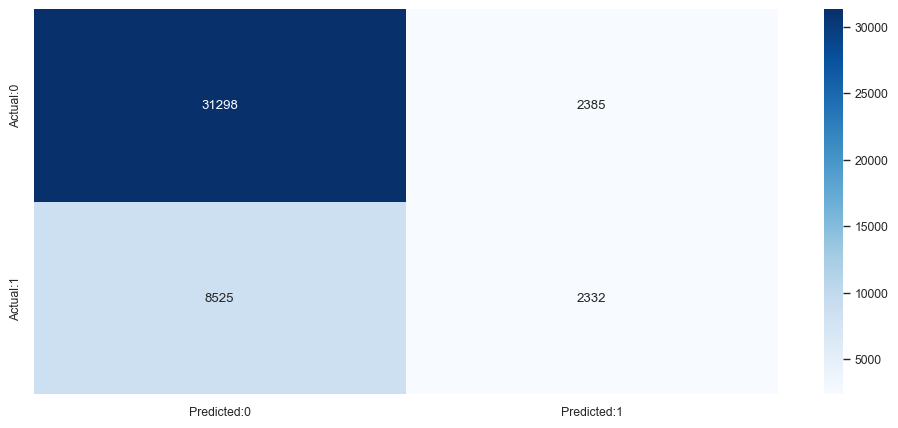

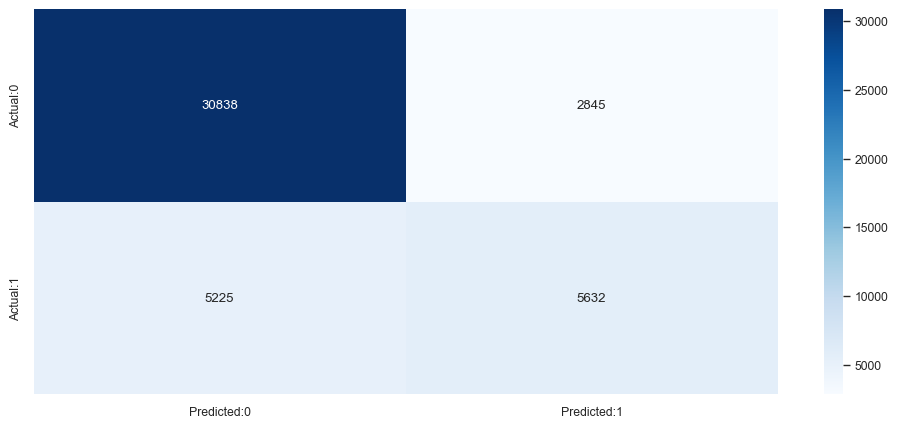

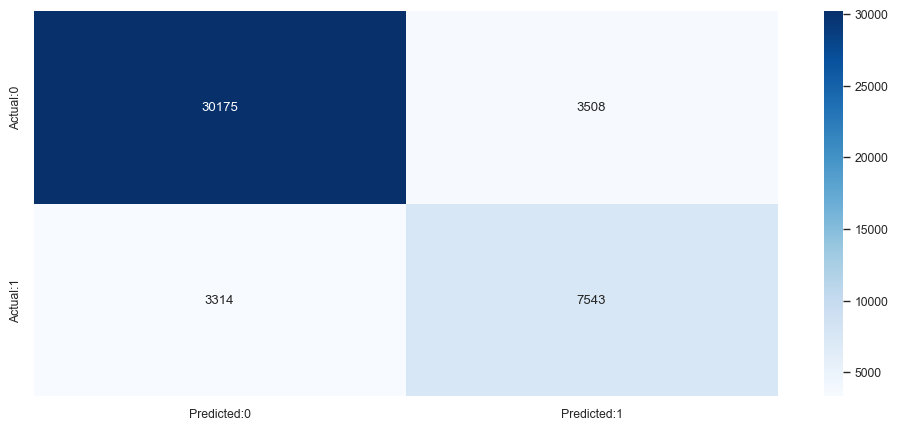

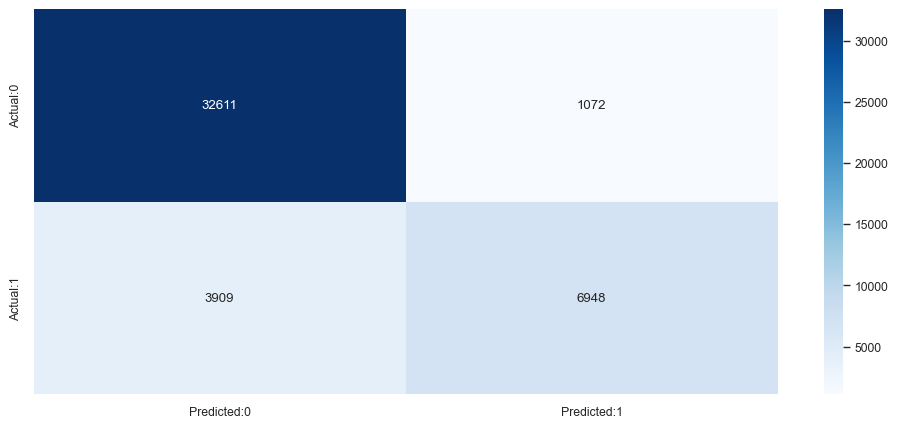

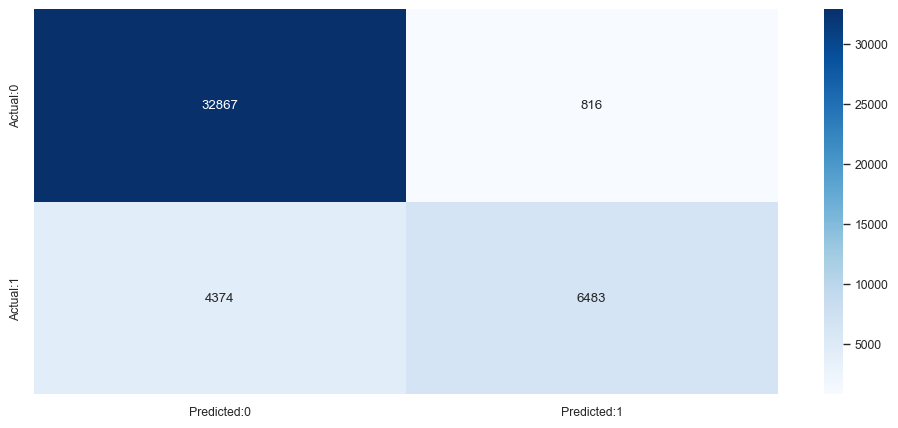

In [66]:
# checking all model accuracy without balancing 

#LogisticRegression
lngr = LogisticRegression(random_state=2, max_iter=500, )
lngr.fit(X_train,y_train)
lngr_eval = evaluate_model(lngr, X_test, y_test)

# Print result
print('Accuracy of Logistic Regression:',lngr_eval['acc'])

#Knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy of KNN:', knn_eval['acc'])

# Decision Tree 
d_tree = tree.DecisionTreeClassifier(random_state=0)
d_tree.fit(X_train, y_train)
d_tree_eval = evaluate_model(d_tree, X_test, y_test)

# Print result
print('Accuracy of Decision Tree:', d_tree_eval['acc'])

#Random Forest 
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
rfc_eval = evaluate_model(rfc, X_test, y_test)

# Print result
print('Accuracy of Randomforest:', rfc_eval['acc'])

# GradientBoosting Classifier
gbc = GradientBoostingClassifier(max_depth=2, random_state=0)
gbc.fit(X_train,y_train)
gbc_eval = evaluate_model(gbc, X_test, y_test)

# Print result
print('Accuracy of GradientBoosting:',gbc_eval['acc'])

# Treating Imbalance Issue

In [67]:

# Using Smote to correct imbalance dataset
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

<AxesSubplot:ylabel='STATUS'>

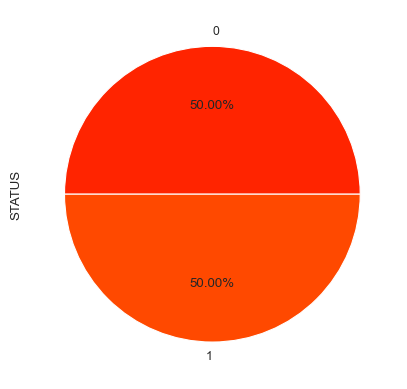

In [68]:
y_train_sm.value_counts().plot.pie(autopct='%1.2f%%')

# Exploring different Algorithm using balanced dataset

C:\Users\joyma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7037269869779973
Precision: 0.4297133241180359
Recall: 0.6585612968591692
F1 Score: 0.5200756473668897
Cohens Kappa Score: 0.3192396375741341
Area Under Curve: 0.7721199778731168
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0        24194         9489
Actual:1         3707         7150
classification_report
               precision    recall  f1-score   support

           0       0.87      0.72      0.79     33683
           1       0.43      0.66      0.52     10857

    accuracy                           0.70     44540
   macro avg       0.65      0.69      0.65     44540
weighted avg       0.76      0.70      0.72     44540



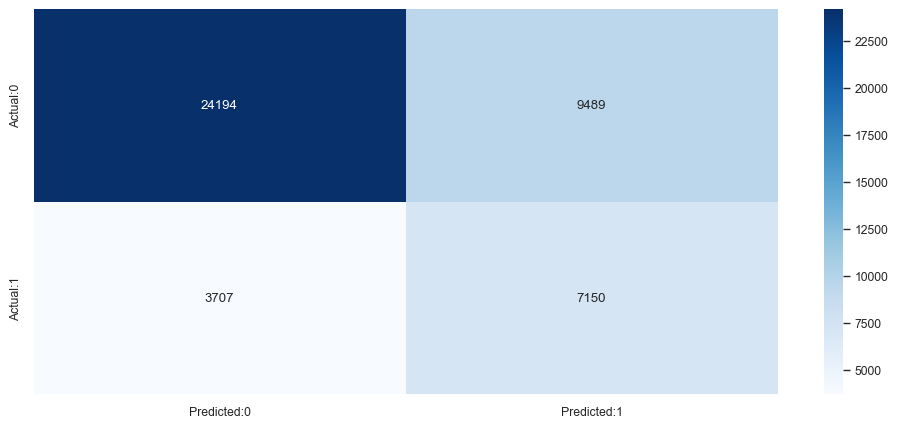

In [69]:
# Building a model using LogisticRegression 

lngr_sm = LogisticRegression(random_state=2, max_iter=500, )

lngr_sm.fit(X_train_sm,y_train_sm)


# Evaluate Model
lngr_eval_sm = evaluate_model(lngr_sm, X_test, y_test)

# Print result
print('Accuracy:',lngr_eval_sm['acc'])
print('Precision:', lngr_eval_sm['prec'])
print('Recall:',lngr_eval_sm['rec'])
print('F1 Score:',lngr_eval_sm['f1'])
print('Cohens Kappa Score:',lngr_eval_sm['kappa'])
print('Area Under Curve:', lngr_eval_sm['auc'])
print('Confusion Matrix:\n', lngr_eval_sm['cm'])
print('classification_report\n', lngr_eval_sm['class_report'])

C:\Users\joyma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.7008980691513247
Precision: 0.4327054327054327
Recall: 0.729943815050198
F1 Score: 0.543329219799808
Cohens Kappa Score: 0.34190016099416143
Area Under Curve: 0.7783107618872993
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0        23293        10390
Actual:1         2932         7925


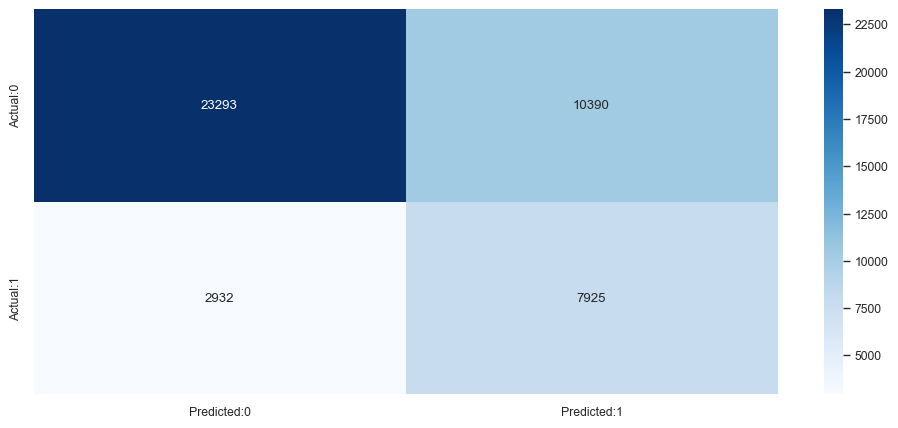

In [70]:
# Building a model using KNeighborsClassifier 

knn_sm = KNeighborsClassifier(n_neighbors = 5)

knn_sm.fit(X_train_sm, y_train_sm)


# Evaluate Model
knn_eval_sm = evaluate_model(knn_sm, X_test, y_test)

# Print result
print('Accuracy:', knn_eval_sm['acc'])
print('Precision:', knn_eval_sm['prec'])
print('Recall:', knn_eval_sm['rec'])
print('F1 Score:', knn_eval_sm['f1'])
print('Cohens Kappa Score:', knn_eval_sm['kappa'])
print('Area Under Curve:', knn_eval_sm['auc'])
print('Confusion Matrix:\n', knn_eval_sm['cm'])

Accuracy: 0.8349124382577459
Precision: 0.6474499242551759
Recall: 0.708575112830432
F1 Score: 0.6766348564140904
Cohens Kappa Score: 0.5661006127230376
Area Under Curve: 0.792104852974311
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0        29494         4189
Actual:1         3164         7693


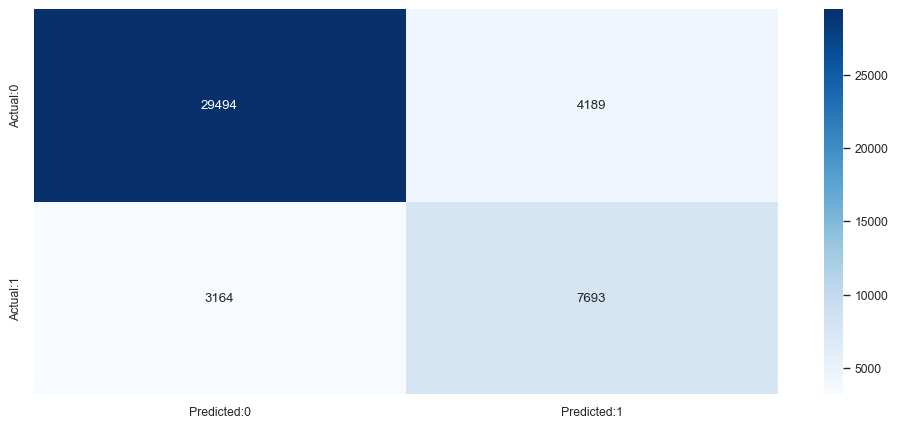

In [71]:
# Building a model using Decision Tree 
d_tree_sm = tree.DecisionTreeClassifier(random_state=0)

d_tree_sm.fit(X_train_sm, y_train_sm)

# Evaluate Model
d_tree_eval_sm = evaluate_model(d_tree_sm, X_test, y_test)

# Print result
print('Accuracy:', d_tree_eval_sm['acc'])
print('Precision:', d_tree_eval_sm['prec'])
print('Recall:', d_tree_eval_sm['rec'])
print('F1 Score:', d_tree_eval_sm['f1'])
print('Cohens Kappa Score:', d_tree_eval_sm['kappa'])
print('Area Under Curve:', d_tree_eval_sm['auc'])
print('Confusion Matrix:\n', d_tree_eval_sm['cm'])

In [72]:
print(tree.export_text(d_tree_sm))

|--- feature_1 <= 3.50
|   |--- class: 0
|--- feature_1 >  3.50
|   |--- feature_6 <= 37.00
|   |   |--- feature_6 <= 20.00
|   |   |   |--- feature_4 <= -0.09
|   |   |   |   |--- feature_0 <= -1.11
|   |   |   |   |   |--- feature_4 <= -0.75
|   |   |   |   |   |   |--- feature_0 <= -1.49
|   |   |   |   |   |   |   |--- feature_5 <= 844.00
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.63
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  -1.63
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 527.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_5 >  527.50
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 7.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  7.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  844.00
|  

Accuracy: 0.8657386618769646
Precision: 0.7388578705064159
Recall: 0.6947591415676522
F1 Score: 0.7161302572866229
Cohens Kappa Score: 0.6283161115838938
Area Under Curve: 0.9285865312660192
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0        31017         2666
Actual:1         3314         7543


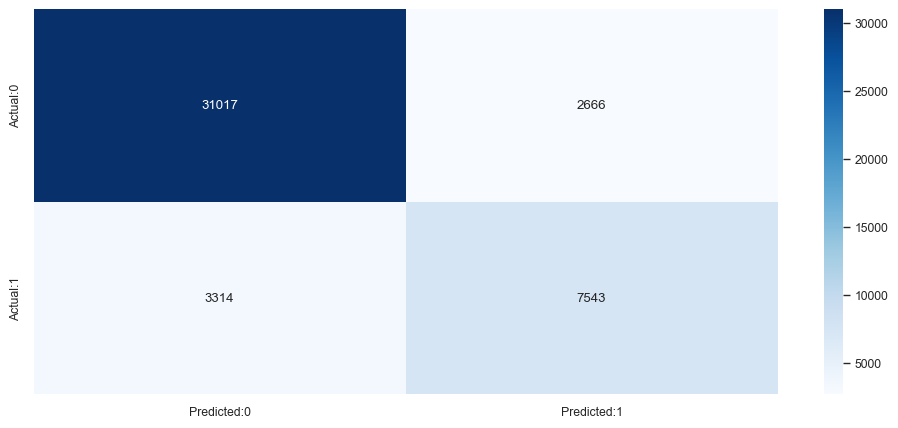

In [74]:
# Building a model using Random Forest 

rfc_sm = RandomForestClassifier(random_state=0)

rfc_sm.fit(X_train_sm, y_train_sm)


# Evaluate Model
rfc_eval_sm = evaluate_model(rfc_sm, X_test, y_test)

# Print result
print('Accuracy:', rfc_eval_sm['acc'])
print('Precision:', rfc_eval_sm['prec'])
print('Recall:', rfc_eval_sm['rec'])
print('F1 Score:', rfc_eval_sm['f1'])
print('Cohens Kappa Score:', rfc_eval_sm['kappa'])
print('Area Under Curve:', rfc_eval_sm['auc'])
print('Confusion Matrix:\n', rfc_eval_sm['cm'])

Accuracy: 0.8206106870229007
Precision: 0.6002798181182232
Recall: 0.7903656627060882
F1 Score: 0.6823314249363868
Cohens Kappa Score: 0.5605772764700243
Area Under Curve: 0.9214568384608706
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0        27969         5714
Actual:1         2276         8581


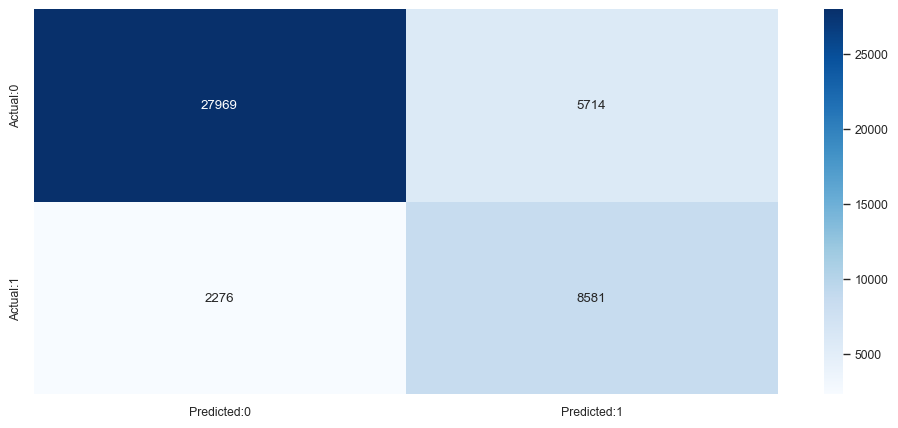

In [75]:
# Building a model using GradientBoosting Classifier

gbc_sm = GradientBoostingClassifier(max_depth=2, random_state=0)

gbc_sm.fit(X_train_sm,y_train_sm)


# Evaluate Model
gbc_eval_sm = evaluate_model(gbc_sm, X_test, y_test)

# Print result
print('Accuracy:',gbc_eval_sm['acc'])
print('Precision:', gbc_eval_sm['prec'])
print('Recall:',gbc_eval_sm['rec'])
print('F1 Score:',gbc_eval_sm['f1'])
print('Cohens Kappa Score:',gbc_eval_sm['kappa'])
print('Area Under Curve:', gbc_eval_sm['auc'])
print('Confusion Matrix:\n', gbc_eval_sm['cm'])

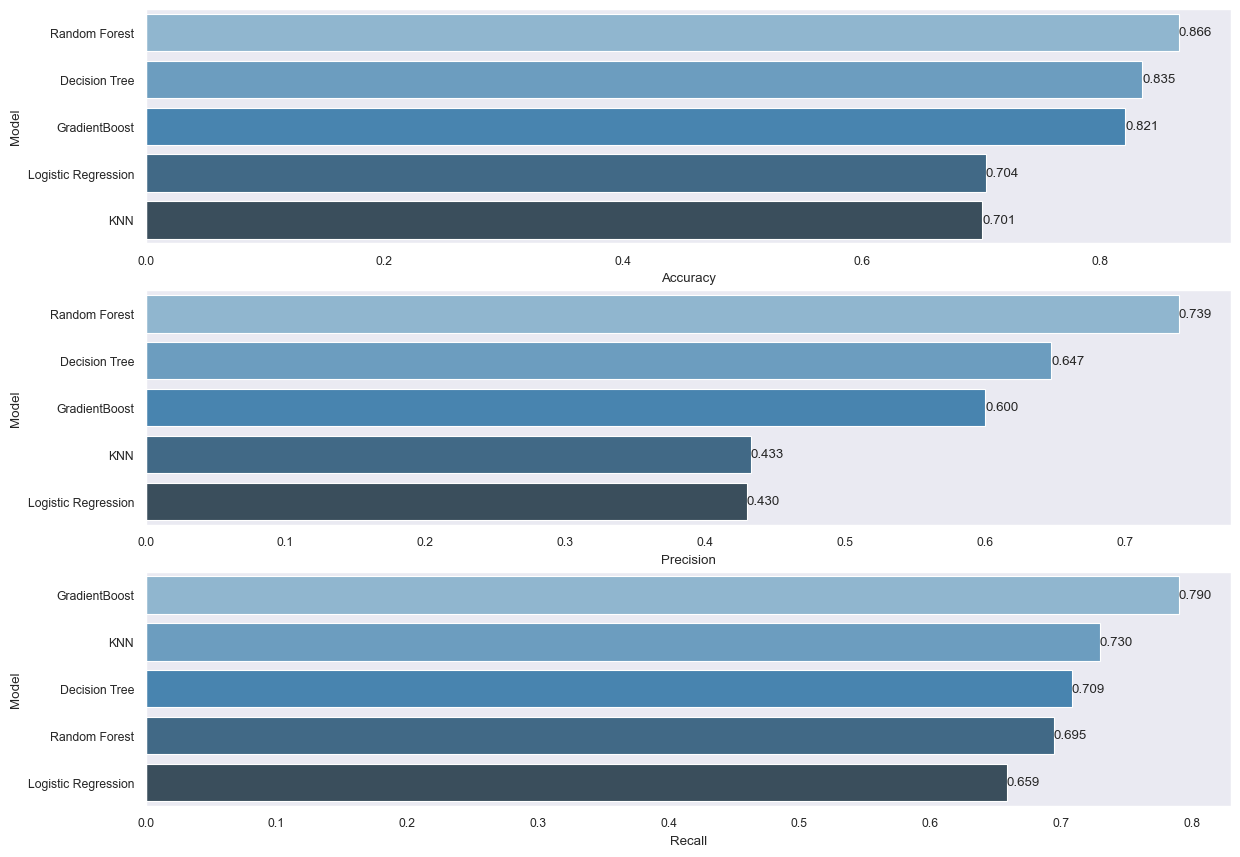

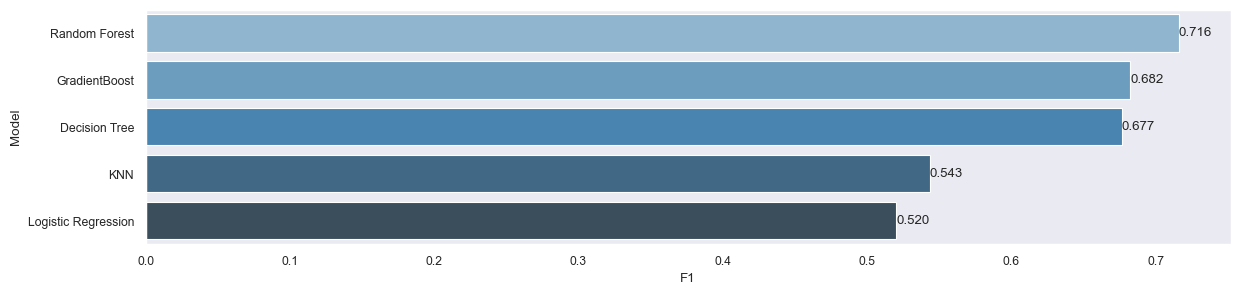

In [76]:
# printing all Result

com_result = pd.DataFrame({"Model": ["Logistic Regression",  "KNN", "Decision Tree", "Random Forest", "GradientBoost"],  
                        "Accuracy": [lngr_eval_sm['acc'], knn_eval_sm['acc'],  d_tree_eval_sm['acc'],  rfc_eval_sm['acc'],  gbc_eval_sm['acc']],
                        "Precision": [lngr_eval_sm['prec'], knn_eval_sm['prec'], d_tree_eval_sm['prec'], rfc_eval_sm['prec'], gbc_eval_sm['prec']],
                        "Recall": [lngr_eval_sm['rec'], knn_eval_sm['rec'], d_tree_eval_sm['rec'], rfc_eval_sm['rec'], gbc_eval_sm['rec']],
                        "F1": [lngr_eval_sm['f1'], knn_eval_sm['f1'], d_tree_eval_sm['f1'], rfc_eval_sm['f1'], gbc_eval_sm['f1']]})
                       
             
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,14))
plt.subplot(411)
com_result = com_result.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=com_result, palette="Blues_d")
labels(ax)

plt.subplot(412)
com_result = com_result.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=com_result, palette="Blues_d")
labels(ax)

plt.subplot(413)
com_result = com_result.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=com_result, palette="Blues_d")
labels(ax)
                                    
plt.figure(figsize=(14,14))
plt.subplot(414)
com_result = com_result.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=com_result, palette="Blues_d")
labels(ax)


plt.show()

In [77]:
# Using Hyper parameter to boost the algorithm with the highest accuracy (RandomForest model)

param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini']
}
print(param_grid)


{'n_estimators': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [78]:
#Running RandomizedSearchCV to find best parameters
from sklearn.model_selection import RandomizedSearchCV
rcv = RandomizedSearchCV(estimator=rfc_sm,param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)

# training the RandomizedSearchCV to find the best parameters
rcv.fit(X_train_sm,y_train_sm)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 7, 10, 12,
                                                              14],
                                        'n_estimators': [2, 12, 23, 34, 45, 56,
                                                         67, 78, 89, 100]},
                   verbose=2)

In [79]:
# check best parameter
rcv.best_params_

{'n_estimators': 67,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 450,
 'criterion': 'entropy'}

Accuracy: 0.8879658733722496
Precision: 0.863191779125913
Recall: 0.6421663442940039
F1 Score: 0.736452941797824
Cohens Kappa Score: 0.667251843155326
Area Under Curve: 0.9357667837799554
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0        32578         1105
Actual:1         3885         6972


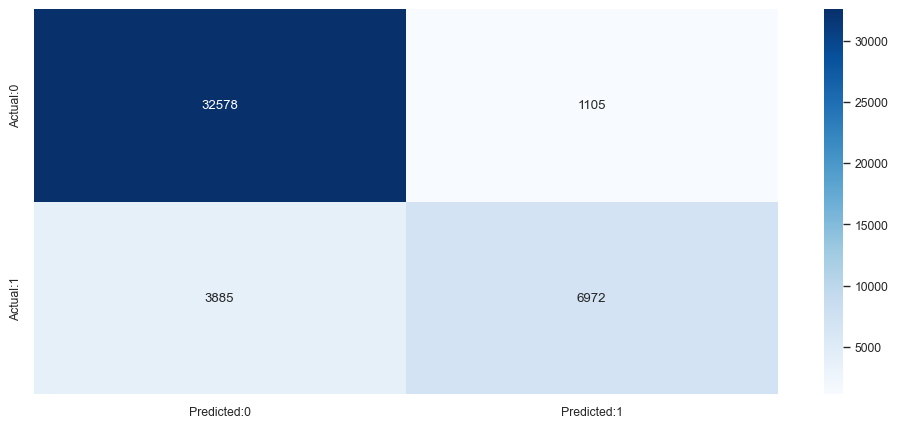

In [88]:
#Testing the algorithm using suitable parameter

rfc_p = RandomForestClassifier(n_estimators = 67,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'log2',
 max_depth= 450,
 criterion = 'entropy',random_state=0)

rfc_p.fit(X_train, y_train)


# Evaluate Model
rfc_eval_p = evaluate_model(rfc_p, X_test, y_test)

# Print result
print('Accuracy:', rfc_eval_p['acc'])
print('Precision:', rfc_eval_p['prec'])
print('Recall:', rfc_eval_p['rec'])
print('F1 Score:', rfc_eval_p['f1'])
print('Cohens Kappa Score:', rfc_eval_p['kappa'])
print('Area Under Curve:', rfc_eval_p['auc'])
print('Confusion Matrix:\n', rfc_eval_p['cm'])

Accuracy: 0.8657386618769646
Precision: 0.7388578705064159
Recall: 0.6947591415676522
F1 Score: 0.7161302572866229
Cohens Kappa Score: 0.6283161115838938
Area Under Curve: 0.9285865312660192
Confusion Matrix:
           Predicted:0  Predicted:1
Actual:0        31017         2666
Actual:1         3314         7543


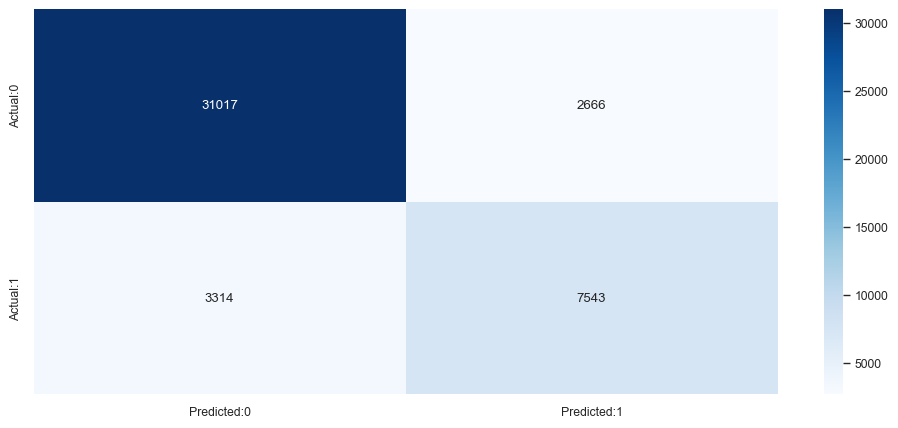

In [89]:
#Testing the algorithm using suitable parameter with balance datasetS
rfc_sm_p = RandomForestClassifier(n_estimators = 67,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'log2',
 max_depth= 450,
 criterion = 'entropy',random_state=0)

rfc_sm_p.fit(X_train_sm, y_train_sm)


# Evaluate Model
rfc_eval_sm_p = evaluate_model(rfc_sm, X_test, y_test)

# Print result
print('Accuracy:', rfc_eval_sm_p['acc'])
print('Precision:',rfc_eval_sm_p['prec'])
print('Recall:', rfc_eval_sm_p['rec'])
print('F1 Score:', rfc_eval_sm_p['f1'])
print('Cohens Kappa Score:', rfc_eval_sm_p['kappa'])
print('Area Under Curve:', rfc_eval_sm_p['auc'])
print('Confusion Matrix:\n', rfc_eval_sm_p['cm'])